___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

## colab Update

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
# %%time
# # colab Update
# !python --version && \
# pip list --outdated && \
# sudo -H pip install $(pip list -o | tail +3 | grep -v sdist | awk '{print $1}') -U -q && \
# pip install --upgrade jax jaxlib -q

In [17]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 26.0 MB/s 
     |████████████████████████████████| 960 kB 55.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


**restart**

## import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [2]:
random_state = seed = 42

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
df_origin = pd.read_csv("./Churn_Modelling.csv")
df = df_origin.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
(df.isna().mean()*100)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [8]:
df.describe().T.style.background_gradient(cmap='PiYG_r', axis=1)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [9]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
]).T

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
skew,0.0,0.001149,-0.071607,1.011320,0.010991,-0.141109,0.745568,-0.901812,-0.060437,0.002085,1.471611
kurtosis,-1.2,-1.196113,-0.425726,1.395347,-1.165225,-1.489412,0.582981,-1.186973,-1.996747,-1.181518,0.165671


In [10]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [11]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

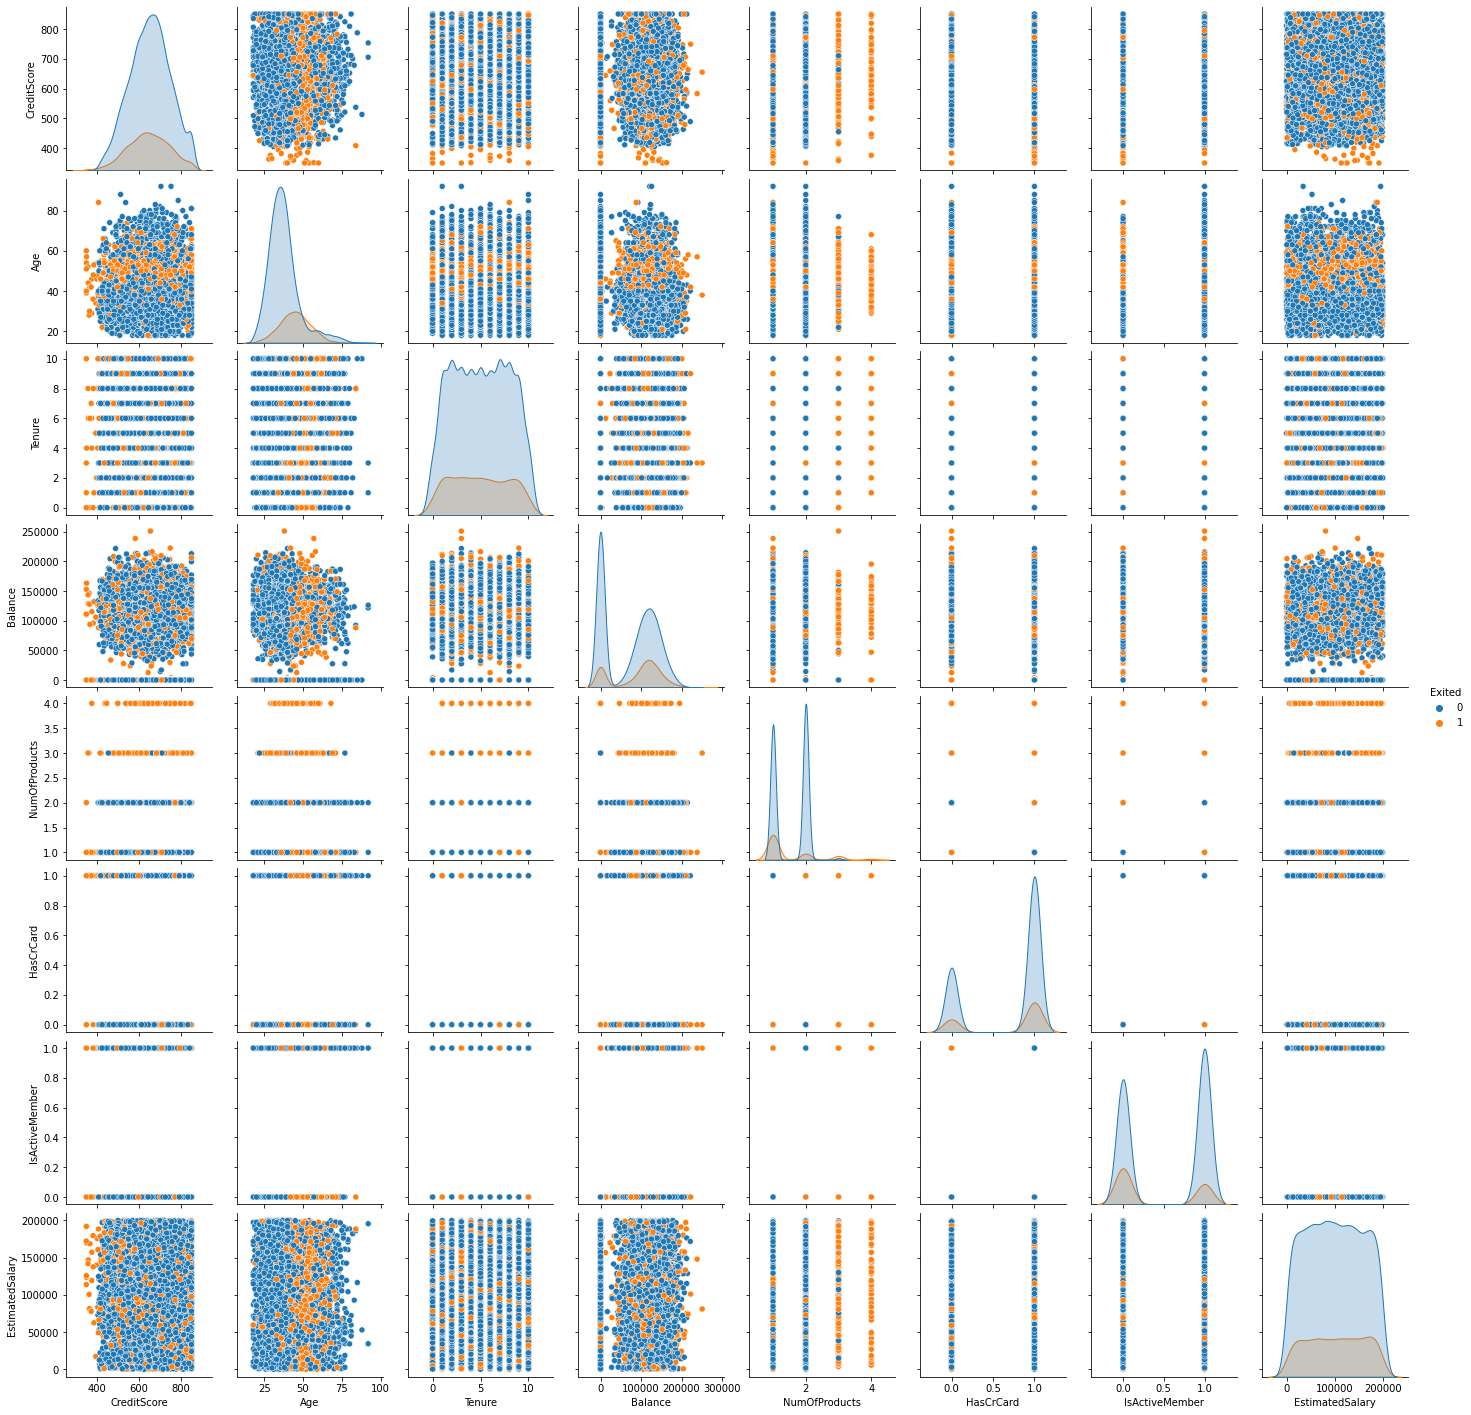

In [14]:
sns.pairplot(df, hue= "Exited")

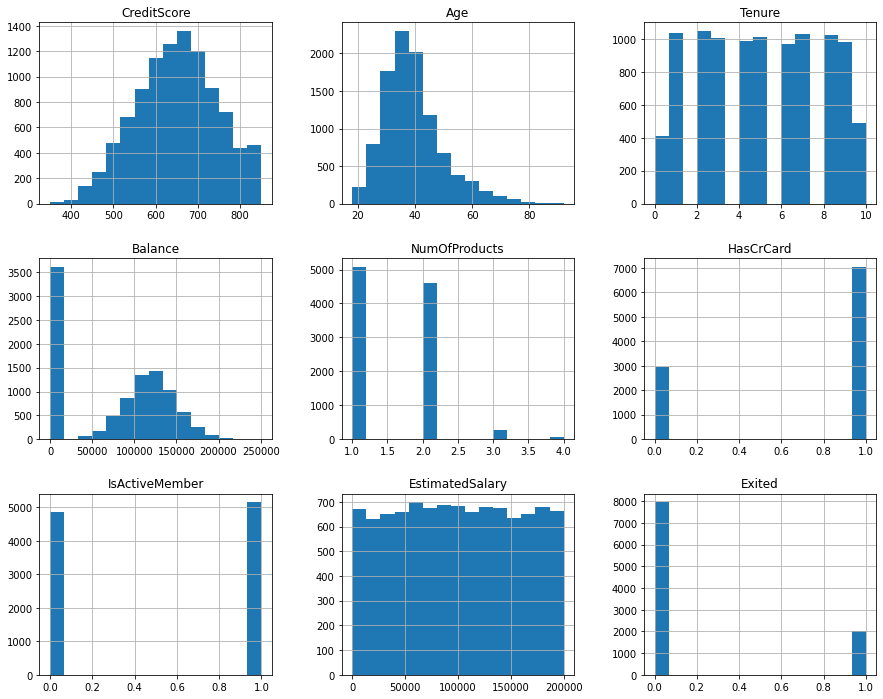

In [12]:
df.hist(figsize=(15, 12), bins=15);

In [13]:
# multiolinarity
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

<AxesSubplot:>

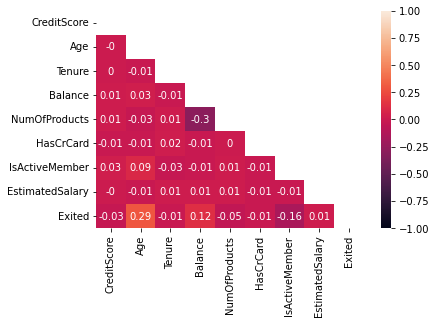

In [14]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)

<AxesSubplot:>

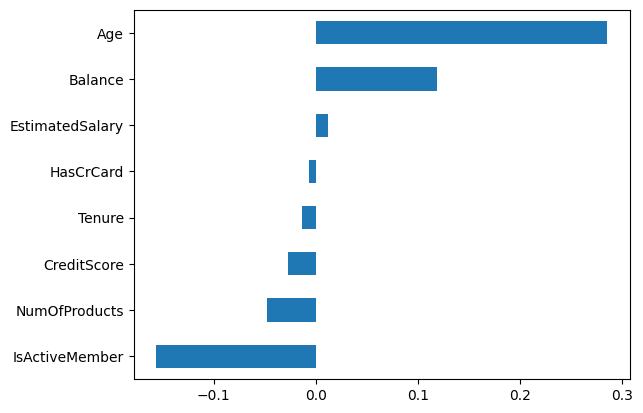

In [ ]:
df.corr()["Exited"].sort_values(ascending=True)[:-1].plot(kind="barh")

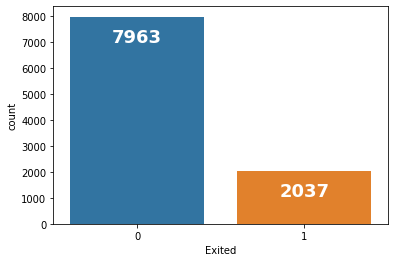

In [15]:
g = sns.countplot(x=df["Exited"])
for c in g.containers:
  g.bar_label(c, padding=-29, fontsize=18, color='w', weight='bold');

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [46]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_state)

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [49]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

# Modelling & Model Performance

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

from sklearn.metrics import  SCORERS, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

## without class_weigth

### Create The Model

In [51]:
tf.random.set_seed(seed)

model1 = Sequential()

model1.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model1.add(Dense(8, activation = "relu"))
model1.add(Dense(4, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [52]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                224       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [53]:
%%time
model1.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1500, verbose=0)

CPU times: user 17min 57s, sys: 1min 58s, total: 19min 56s
Wall time: 14min 22s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [54]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.index += 1
loss_df.head()

,loss,accuracy,recall,auc,precision_at_recall_3,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_3
1,0.588436,0.748765,0.127724,0.518082,0.210668,0.497402,0.798889,0.0,0.584610,0.209700
2,0.493941,0.796049,0.000000,0.605027,0.221420,0.479958,0.798889,0.0,0.663629,0.244663
3,0.478995,0.796049,0.000000,0.669246,0.251853,0.460650,0.798889,0.0,0.718309,0.281853
4,0.464663,0.796049,0.000000,0.705426,0.272690,0.446562,0.798889,0.0,0.741338,0.305907
5,0.455172,0.796049,0.000000,0.723335,0.280815,0.435932,0.798889,0.0,0.761766,0.317982


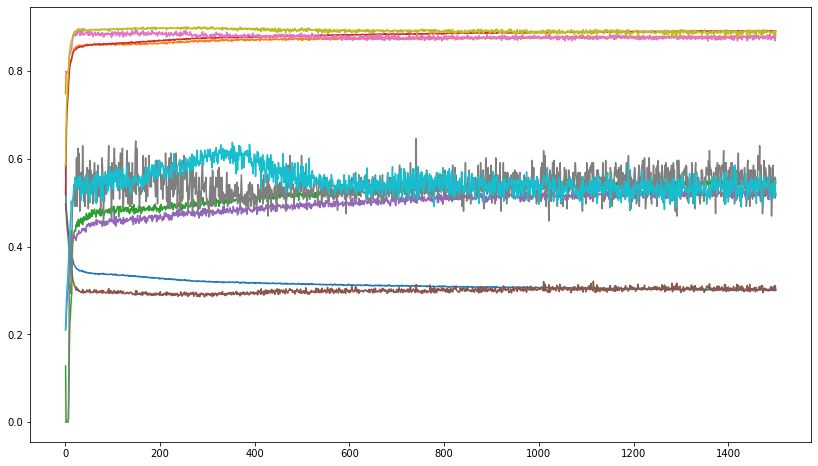

In [55]:
loss_df.plot(legend=False, figsize=(14,8));

(0.28, 0.38)

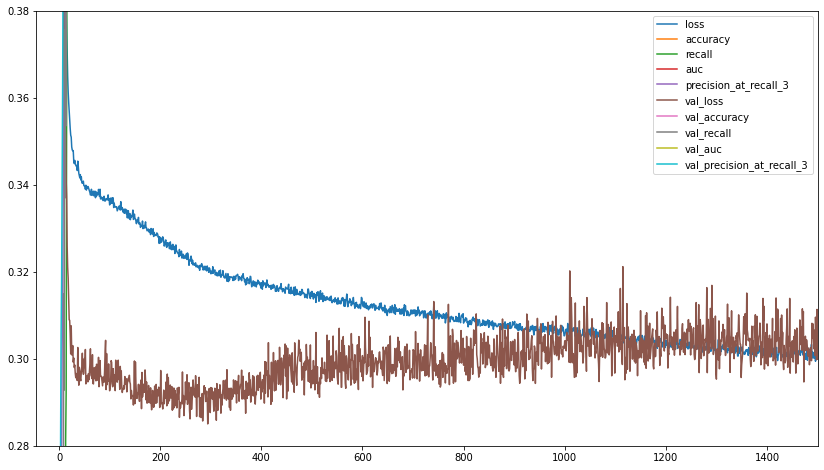

In [56]:
loss_df.plot(figsize=(14,8));
plt.xlim([-45, 1500])
plt.ylim([0.28, 0.38])

In [57]:
model1.evaluate(X_test, y_test, verbose=0)

[0.35331976413726807,
 0.8600000143051147,
 0.4803921580314636,
 0.8555461168289185,
 0.4327176809310913]

In [58]:
model1.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_3']

In [59]:
loss, _, recall, *_ = model1.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.35331976413726807
recall :  0.4803921580314636


In [60]:
y_pred = model1.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[762  34]
 [106  98]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.74      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [61]:
# defining class_weights

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train) 
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [62]:
tf.random.set_seed(seed)

model2 = Sequential()

model2.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model2.add(Dense(8, activation = "relu"))
model2.add(Dense(4, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall]) # early stop'u accuracy'ye bakarak da yapabiliriz.

In [63]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                224       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 4)                 36        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [64]:
%%time
model2.fit(x=X_train, y=y_train, validation_split=.1, batch_size=64, epochs=1500, verbose=0, class_weight=class_weights)

CPU times: user 18min 32s, sys: 2min 10s, total: 20min 42s
Wall time: 14min 23s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [65]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.index += 1
loss_df

,loss,accuracy,recall,auc,precision_at_recall_4,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_4
1,0.684075,0.501358,0.641041,0.589443,0.216749,0.684111,0.572222,0.651934,0.662519,0.240864
2,0.660887,0.635679,0.585351,0.663175,0.251364,0.660479,0.646667,0.734807,0.735214,0.298969
3,0.627823,0.649383,0.670702,0.712822,0.288763,0.605813,0.704444,0.729282,0.759596,0.316594
4,0.604204,0.673210,0.697337,0.740677,0.294183,0.580882,0.704444,0.701657,0.777219,0.350120
5,0.586960,0.688765,0.705811,0.758620,0.312515,0.540646,0.727778,0.651934,0.797620,0.370927
...,...,...,...,...,...,...,...,...,...,...
1496,0.399400,0.802716,0.819613,0.896573,0.524713,0.415029,0.798889,0.834254,0.892438,0.519298
1497,0.397543,0.804568,0.812954,0.897379,0.526149,0.408444,0.808889,0.817680,0.893464,0.529197
1498,0.398249,0.807407,0.808717,0.897236,0.521894,0.409766,0.813333,0.828729,0.894171,0.530909
1499,0.397094,0.806173,0.813559,0.897844,0.531300,0.409064,0.804444,0.801105,0.891320,0.503472


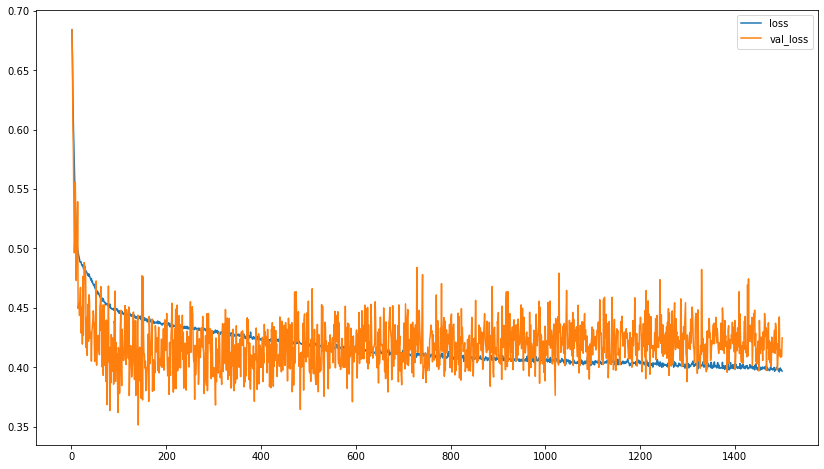

In [66]:
loss_df[["loss", "val_loss"]].plot(figsize=(14,8));
plt.show()

In [67]:
model2.evaluate(X_test, y_test, verbose=0)

[0.48680567741394043,
 0.7799999713897705,
 0.7745097875595093,
 0.8544530868530273,
 0.46590909361839294]

In [68]:
model2.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_4']

In [69]:
loss, _, recall, *_ = model2.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.48680567741394043
recall :  0.7745097875595093


In [70]:
y_pred = model2.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[622 174]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.48      0.77      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [71]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [72]:
tf.random.set_seed(seed)

model3 = Sequential()

model3.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model3.add(Dense(8, activation = "relu"))
model3.add(Dense(4, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

optimizer = Adam(lr=0.005)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [73]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                224       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [74]:
%%time
model3.fit(x=X_train, y=y_train, validation_split=.1, batch_size=64, epochs=1000, verbose=0, class_weight=class_weights)

CPU times: user 12min 20s, sys: 1min 27s, total: 13min 47s
Wall time: 9min 22s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [75]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.index += 1
loss_df

,loss,accuracy,recall,auc,precision_at_recall_5,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_5
1,0.648833,0.615185,0.633172,0.671840,0.252850,0.541150,0.768889,0.624309,0.765193,0.307851
2,0.579438,0.701358,0.694310,0.765973,0.326055,0.472035,0.814444,0.657459,0.834004,0.427729
3,0.526450,0.747654,0.733656,0.815991,0.376350,0.445725,0.805556,0.784530,0.876248,0.486577
4,0.504266,0.757407,0.743947,0.833173,0.417402,0.447542,0.787778,0.801105,0.876578,0.500000
5,0.501466,0.759506,0.747579,0.834645,0.406519,0.445321,0.796667,0.806630,0.882656,0.506993
...,...,...,...,...,...,...,...,...,...,...
996,0.408544,0.799383,0.794794,0.891668,0.499245,0.490396,0.761111,0.850829,0.883459,0.508772
997,0.412693,0.796667,0.797216,0.889135,0.496627,0.454616,0.796667,0.812155,0.879417,0.515901
998,0.411231,0.798272,0.794189,0.890241,0.495516,0.438512,0.796667,0.801105,0.880101,0.508772
999,0.406411,0.800494,0.805690,0.893188,0.507257,0.414032,0.815556,0.779006,0.881150,0.480132


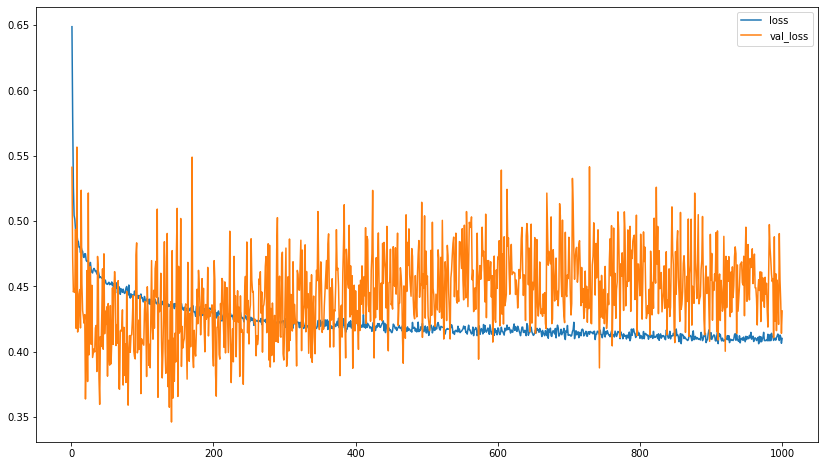

In [76]:
loss_df[["loss", "val_loss"]].plot(figsize=(14,8));
plt.show()

In [77]:
model3.evaluate(X_test, y_test, verbose=0)

[0.45152223110198975,
 0.7919999957084656,
 0.7696078419685364,
 0.8530304431915283,
 0.4270833432674408]

In [78]:
model3.metrics_names

['loss', 'accuracy', 'recall', 'auc', 'precision_at_recall_5']

In [79]:
loss, _, recall, *_ = model3.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.45152223110198975
recall :  0.7696078419685364


In [80]:
y_pred = model3.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[635 161]
 [ 47 157]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       796
           1       0.49      0.77      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.81      1000



### Add Dropout Layer

In [81]:
from tensorflow.keras.layers import Dropout

In [82]:
tf.random.set_seed(seed)

model4 = Sequential()

model4.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model4.add(Dropout(0.2))

model4.add(Dense(16, activation="relu"))
model4.add(Dropout(0.2))

model4.add(Dense(8, activation="relu"))
model4.add(Dropout(0.2))

model4.add(Dense(1, activation="sigmoid"))

optimizer = Adam(lr=0.001)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model4.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [83]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_27 (Dense)            (None, 1)                

In [84]:
%%time
model4.fit(x=X_train, y=y_train, validation_split=.1, batch_size=64, epochs=1000, verbose=0, class_weight=class_weights)

CPU times: user 12min 47s, sys: 1min 27s, total: 14min 14s
Wall time: 10min 23s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [85]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.index += 1
loss_df

,loss,accuracy,recall,auc,precision_at_recall_6,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_6
1,0.676219,0.489259,0.708232,0.615636,0.228290,0.655131,0.685556,0.668508,0.730019,0.274436
2,0.646666,0.641728,0.615617,0.674663,0.255845,0.633612,0.695556,0.751381,0.751750,0.297131
3,0.633844,0.662222,0.632567,0.697560,0.268397,0.593468,0.726667,0.734807,0.768240,0.313853
4,0.624183,0.671605,0.644068,0.711378,0.276214,0.556962,0.752222,0.668508,0.783224,0.348449
5,0.613371,0.687160,0.651937,0.725946,0.289439,0.575194,0.734444,0.712707,0.795257,0.345882
...,...,...,...,...,...,...,...,...,...,...
996,0.444459,0.790494,0.778450,0.874183,0.475780,0.391270,0.805556,0.806630,0.894805,0.525362
997,0.436552,0.800741,0.797216,0.878712,0.502844,0.388342,0.803333,0.806630,0.893310,0.510563
998,0.438818,0.798765,0.792373,0.877042,0.494025,0.427990,0.765556,0.823204,0.892096,0.491525
999,0.447261,0.792716,0.775424,0.872201,0.471045,0.378056,0.815556,0.762431,0.891539,0.506993


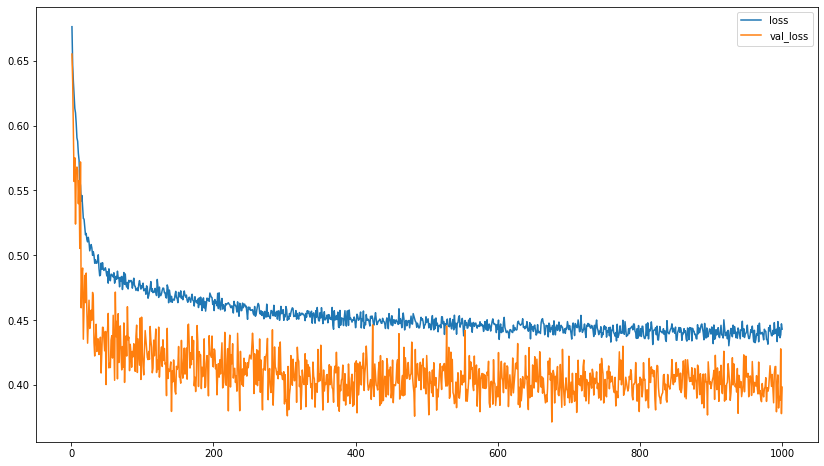

In [86]:
loss_df[["loss", "val_loss"]].plot(figsize=(14,8));
plt.show()

In [87]:
model4.evaluate(X_test, y_test, verbose=0)

[0.4484905004501343,
 0.7870000004768372,
 0.7647058963775635,
 0.8562204241752625,
 0.45303866267204285]

In [88]:
loss, _, recall, *_ = model4.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4484905004501343
recall :  0.7647058963775635


In [89]:
y_pred = model4.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[631 165]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       796
           1       0.49      0.76      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.79      0.80      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [90]:
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
tf.random.set_seed(seed)

model5 = Sequential()

model5.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model5.add(Dense(16, activation = "relu"))
model5.add(Dense(8, activation = "relu"))
model5.add(Dense(1, activation = "sigmoid"))

optimizer = Adam(lr=0.001)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model5.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [92]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                448       
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 8)                 136       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [93]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [94]:
early_stop = EarlyStopping(monitor = "val_loss", verbose = 0, patience = 50, restore_best_weights = True)

In [95]:
%%time
model5.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 0,
          callbacks = [early_stop], class_weight=class_weights)

CPU times: user 4min 37s, sys: 33.2 s, total: 5min 10s
Wall time: 3min 28s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [96]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.index += 1
loss_df

,loss,accuracy,recall,auc,precision_at_recall_7,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_7
1,0.641272,0.590494,0.709443,0.691421,0.262098,0.567488,0.740000,0.668508,0.763146,0.317982
2,0.593120,0.693704,0.685230,0.750670,0.308137,0.532778,0.748889,0.657459,0.796959,0.343602
3,0.575059,0.709630,0.701574,0.769930,0.324185,0.523156,0.753333,0.690608,0.807921,0.369620
4,0.567457,0.716420,0.699758,0.778081,0.333166,0.558865,0.725556,0.745856,0.812082,0.357143
5,0.560019,0.726420,0.697337,0.785282,0.333167,0.521848,0.754444,0.723757,0.822402,0.387701
...,...,...,...,...,...,...,...,...,...,...
187,0.408063,0.809383,0.799637,0.893522,0.519246,0.446598,0.774444,0.790055,0.873966,0.451713
188,0.409365,0.808272,0.800847,0.893057,0.520661,0.411909,0.807778,0.790055,0.876601,0.474026
189,0.408063,0.811358,0.797216,0.893685,0.519246,0.402085,0.808889,0.767956,0.878296,0.483333
190,0.405257,0.811481,0.800847,0.895315,0.525626,0.407617,0.822222,0.784530,0.877358,0.512367


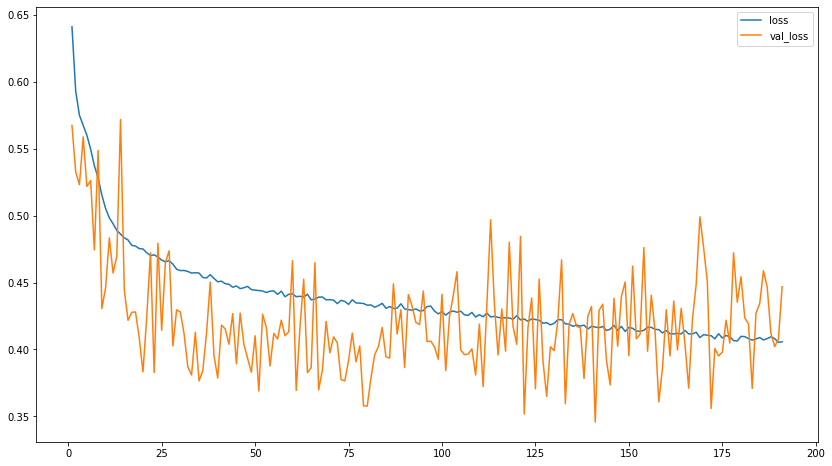

In [97]:
loss_df[["loss", "val_loss"]].plot(figsize=(14,8));
plt.show()

In [98]:
model5.evaluate(X_test, y_test, verbose=0)

[0.4029625654220581,
 0.8090000152587891,
 0.6470588445663452,
 0.8545085191726685,
 0.42326733469963074]

In [99]:
loss, _, recall, *_ = model5.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4029625654220581
recall :  0.6470588445663452


In [100]:
y_pred = model5.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[677 119]
 [ 72 132]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       796
           1       0.53      0.65      0.58       204

    accuracy                           0.81      1000
   macro avg       0.71      0.75      0.73      1000
weighted avg       0.83      0.81      0.82      1000



#### Monitor the "val_recall" as metric

In [101]:
tf.random.set_seed(seed)

model6 = Sequential()

model6.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model6.add(Dense(16, activation = "relu"))
model6.add(Dense(8, activation = "relu"))
model6.add(Dense(1, activation = "sigmoid"))

optimizer = Adam(lr=0.001)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model6.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [102]:
model6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                448       
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [103]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 0, patience = 10, restore_best_weights = True)

In [104]:
%%time
model6.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 2000, verbose = 0,
          callbacks = [early_stop], class_weight=class_weights)

CPU times: user 35.9 s, sys: 4.08 s, total: 40 s
Wall time: 26.9 s


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [105]:
loss_df = pd.DataFrame(model6.history.history)
loss_df.index += 1
loss_df

,loss,accuracy,recall,auc,precision_at_recall_8,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_8
1,0.641272,0.590494,0.709443,0.691421,0.262098,0.567488,0.740000,0.668508,0.763146,0.317982
2,0.593120,0.693704,0.685230,0.750670,0.308137,0.532778,0.748889,0.657459,0.796959,0.343602
3,0.575059,0.709630,0.701574,0.769930,0.324185,0.523156,0.753333,0.690608,0.807921,0.369620
4,0.567457,0.716420,0.699758,0.778081,0.333166,0.558865,0.725556,0.745856,0.812082,0.357143
5,0.560019,0.726420,0.697337,0.785282,0.333167,0.521848,0.754444,0.723757,0.822402,0.387701
6,0.549685,0.733704,0.703995,0.796007,0.358322,0.526217,0.746667,0.756906,0.832306,0.398374
7,0.537268,0.741605,0.708232,0.806679,0.372185,0.474408,0.781111,0.734807,0.847521,0.423977
8,0.528175,0.747160,0.718523,0.814254,0.383188,0.548728,0.718889,0.839779,0.860315,0.428153
9,0.515323,0.753580,0.734867,0.824768,0.393292,0.430481,0.822222,0.751381,0.868291,0.480132
10,0.505308,0.763951,0.747579,0.832492,0.414680,0.446091,0.798889,0.795580,0.879414,0.493197


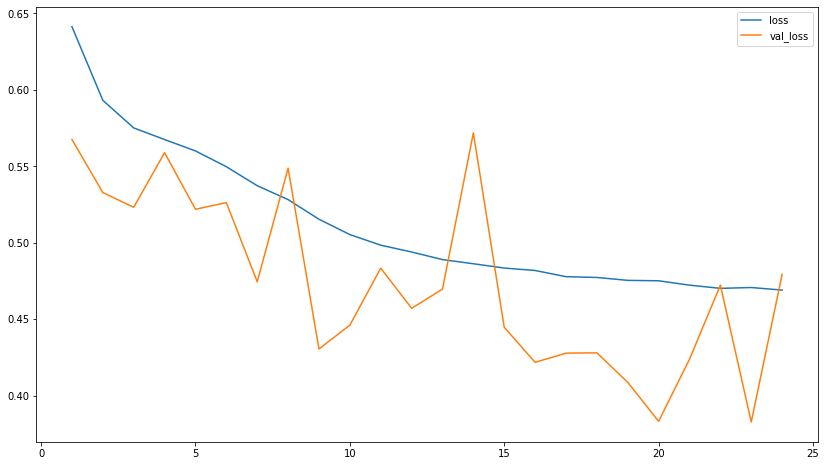

In [106]:
loss_df[["loss", "val_loss"]].plot(figsize=(14,8));
plt.show()

In [107]:
model6.evaluate(X_test, y_test, verbose=0)

[0.6215306520462036,
 0.6700000166893005,
 0.843137264251709,
 0.8431680202484131,
 0.40145984292030334]

In [108]:
loss, _, recall, *_ = model6.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.6215306520462036
recall :  0.843137264251709


In [109]:
y_pred = model6.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[498 298]
 [ 32 172]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.75       796
           1       0.37      0.84      0.51       204

    accuracy                           0.67      1000
   macro avg       0.65      0.73      0.63      1000
weighted avg       0.82      0.67      0.70      1000



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# def build_classifier():
#     tf.random.set_seed(seed)
#     classifier = Sequential()
#     classifier.add(Dense(units = 36, activation = 'relu'))
#     classifier.add(Dense(units = 18, activation = 'relu'))
#     classifier.add(Dense(units = 9, activation = 'relu'))
#     classifier.add(Dense(units = 1, activation = 'sigmoid'))
#     classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier

In [ ]:
# classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

# scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
#                         scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

# df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

# df_scores

In [ ]:
# df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
#                                  index = ["acc", "pre", "rec", "f1"])

# df_scores_summary

## GridSearchCV

In [110]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [111]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [112]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    optimizer = optimizer(learn_rate)
    precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])
    return classifier

In [113]:
early_stop = EarlyStopping(monitor = "val_loss", verbose = 0, patience = 3, restore_best_weights = True)

In [114]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 30)

parameters = {'batch_size': [32, 64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'neg_log_loss',
                          verbose = 0,
                          n_jobs = -1,
                          cv = 5,)

In [115]:
%%time
grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Epoch 1/30
254/254 [==============================] - 3s 7ms/step - loss: 0.6444 - accuracy: 0.6188 - recall: 0.6410 - auc: 0.6790 - precision_at_recall_9: 0.2651 - val_loss: 0.5365 - val_accuracy: 0.7689 - val_recall: 0.6133 - val_auc: 0.7747 - val_precision_at_recall_9: 0.3419
Epoch 2/30
254/254 [==============================] - 1s 6ms/step - loss: 0.6114 - accuracy: 0.6856 - recall: 0.6604 - auc: 0.7284 - precision_at_recall_9: 0.2940 - val_loss: 0.5455 - val_accuracy: 0.7344 - val_recall: 0.7348 - val_auc: 0.8075 - val_precision_at_recall_9: 0.3687
Epoch 3/30
254/254 [==============================] - 1s 6ms/step - loss: 0.5877 - accuracy: 0.7033 - recall: 0.6810 - auc: 0.7564 - precision_at_recall_9: 0.3133 - val_loss: 0.5028 - val_accuracy: 0.7700 - val_recall: 0.7459 - val_auc: 0.8360 - val_precision_at_recall_9: 0.4341
Epoch 4/30
254/254 [==============================] - 1s 6ms/step - loss: 0.5704 - accuracy: 0.7202 - recall: 0.6901 - auc: 0.7752 - precision_at_recall_9: 0.33

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa06b4f3d10>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learn_rate': [0.001, 0.003],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='neg_log_loss')

In [116]:
grid_model.best_score_

-0.4392384845414199

In [117]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [118]:
#grid_model.cv_results_

In [119]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
5,-0.439238,0.022931,1,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,-0.456907,0.009428,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
12,-0.464365,0.025351,3,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
4,-0.465704,0.008935,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
15,-0.468594,0.011020,5,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
13,-0.471098,0.013651,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
20,-0.484057,0.024831,7,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
21,-0.495829,0.021284,8,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
23,-0.500648,0.016662,9,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
0,-0.522575,0.020020,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [120]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[645 151]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.68      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.78      0.80      1000



#### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)

In [ ]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

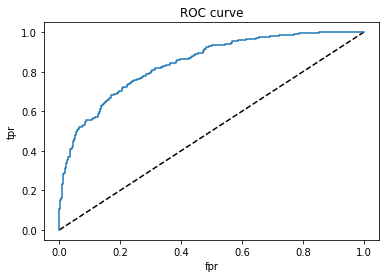

In [121]:
y_pred_proba = model6.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [122]:
roc_auc_score(y_test, y_pred_proba)

0.8430571977534733

In [123]:
average_precision_score(y_test, y_pred_proba)

0.6451300547532245

#### for gridsearchcv model

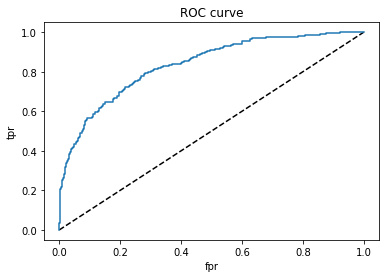

In [124]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [125]:
roc_auc_score(y_test, y_pred_proba)

0.8353901862252439

In [126]:
average_precision_score(y_test, y_pred_proba)

0.6338873212650118

# Final Model and Model Deployment

In [127]:
X.shape, y.shape

((10000, 10), (10000,))

In [128]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [129]:
X = column_trans.fit_transform(X)

In [130]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y), y=y) 
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279040562602034, 1: 2.454590083456063}

## Final Model

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [131]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(15, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

optimizer = RMSprop(lr=0.003)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'AUC', precision_at_recall])

In [132]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 0, patience = 15, restore_best_weights = True)

In [133]:
%%time
model.fit(x = X, y = y, validation_split = 0.1, batch_size = 32, epochs = 50, verbose = 0,
          callbacks = [early_stop], class_weight=class_weights)

CPU times: user 53.3 s, sys: 5.72 s, total: 59 s
Wall time: 41.5 s


In [134]:
loss_df = pd.DataFrame(model.history.history)
loss_df.index += 1
loss_df

,loss,accuracy,recall,auc,precision_at_recall_10,val_loss,val_accuracy,val_recall,val_auc,val_precision_at_recall_10
1,0.665704,0.561889,0.718515,0.664777,0.257439,0.728173,0.599,0.670391,0.698038,0.250871
2,0.623561,0.670111,0.678149,0.727651,0.293946,0.616039,0.739,0.581006,0.713982,0.179000
3,0.593623,0.701778,0.700215,0.760819,0.324712,0.797886,0.548,0.815642,0.754374,0.262681
4,0.567077,0.719556,0.725511,0.787211,0.352442,0.646862,0.675,0.748603,0.768099,0.281553
5,0.544732,0.737000,0.721206,0.805755,0.379644,0.695633,0.650,0.787709,0.787829,0.300626
6,0.523267,0.757333,0.739505,0.822331,0.406923,0.487384,0.795,0.608939,0.792871,0.316594
7,0.507383,0.763333,0.735737,0.832866,0.410906,0.584933,0.718,0.770950,0.814503,0.334884
8,0.496712,0.770444,0.745425,0.839628,0.415809,0.652339,0.665,0.837989,0.815908,0.346062
9,0.489514,0.773333,0.759419,0.845105,0.435074,0.468745,0.777,0.653631,0.822692,0.353808
10,0.483610,0.778222,0.762110,0.849269,0.438550,0.613235,0.686,0.837989,0.822393,0.348235


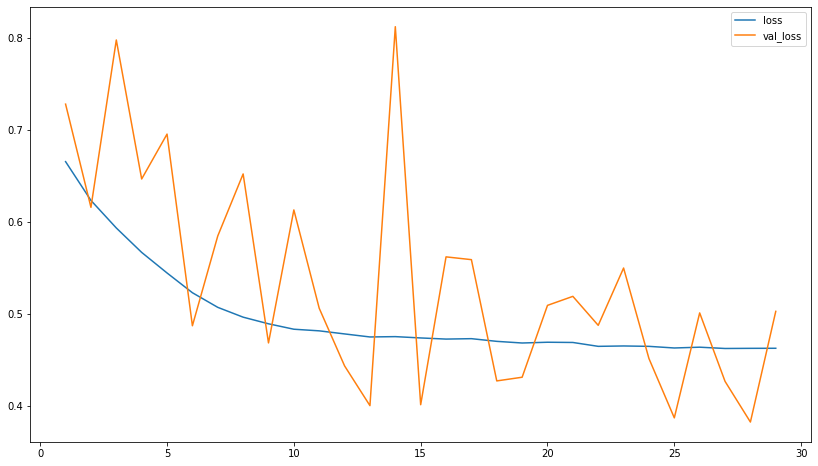

In [135]:
loss_df[["loss", "val_loss"]].plot(figsize=(14,8));
plt.show()

In [136]:
loss, _, recall, *_ = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.7751271724700928
recall :  0.9215686321258545


In [137]:
y_pred = model.predict(X) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[4081 3882]
 [ 156 1881]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67      7963
           1       0.33      0.92      0.48      2037

    accuracy                           0.60     10000
   macro avg       0.64      0.72      0.58     10000
weighted avg       0.83      0.60      0.63     10000



In [138]:
roc_auc_score(y_test, y_pred_proba)

0.8353901862252439

In [139]:
average_precision_score(y_test, y_pred_proba)

0.6338873212650118

## Saving Final Model and Scaler

In [142]:
import pickle

pickle.dump(column_trans, open("/content/drive/MyDrive/transform_customer_churn.pkl", 'wb'))

In [143]:
model.save('/content/drive/MyDrive/model_customer_churn.h5')

## Loading Model and Scaler

In [144]:
from tensorflow.keras.models import load_model

In [146]:
transform_churn = pickle.load(open("/content/drive/MyDrive/transform_customer_churn.pkl", "rb"))
model_churn = load_model('/content/drive/MyDrive/model_customer_churn.h5')

## Prediction

In [147]:
df['Exited'].head(1)

0    1
Name: Exited, dtype: int64

In [148]:
mean_human = df.drop('Exited', axis = 1).iloc[0:1, :]
mean_human

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [149]:
mean_human = transform_churn.transform(mean_human)
mean_human

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [150]:
result = (model_churn.predict(mean_human)>0.5).astype("uint8")
result

array([[1]], dtype=uint8)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___